# Ecommerce Customers Prediction

Terdapat sebuah dataset yang dimiliki oleh sebuah ecommerce fashion. Selain memiliki website dan aplikasi mobile, mereka juga memiliki toko fisik. Customer dapat mengunjungi toko fisik mereka dan melakukan sesi pertemuan untuk mendapatkan saran terkait gaya busana mereka. Dataset memiliki 8 kolom yakni:

- Email: Alamat email customer
- Address: Alamat rumah customer
- Avatar: Warna avatar pada profil customer
- Avg. Session Length: Rata-rata sesi pertemuan dalam saran terkait gaya di dalam toko (dalam menit)
- Time on App: Rata-rata waktu yang dihabisakan memakai aplikasi (dalam menit)
- Time on Website: Rata-rata waktu yang dihabiskan mengakses website (dalam menit)
- Length of Membership: Berapa tahun customer telah menjadi member
- Yearly Amount Spent: Total yang customer habiskan dalam satu tahun ($)

Dengan menggunakan data yang dimiliki ecommerce tersebut mencoba memfokuskan pengembangan mereka apakah lebih memprioritaskan website atau aplikasi mobile.

Dataset: https://www.kaggle.com/srolka/ecommerce-customers

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df = pd.read_csv("Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Dataset terdiri atas 500 data dengan 8 kolom.

In [4]:
# missing value
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Tidak terdapat missing value pada data

In [5]:
df.duplicated().sum()

0

Tidak terdapat data yang duplicat

In [6]:
# describe statistical 
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analyst

### Pairplot

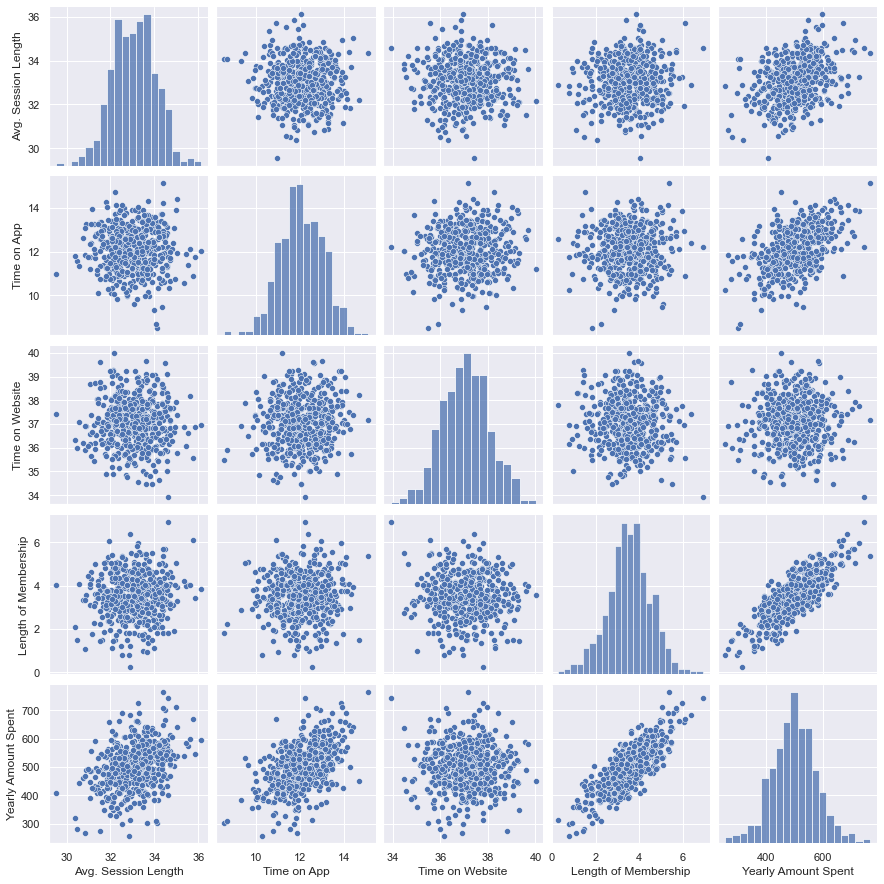

In [7]:
# EDA
sns.pairplot(df)

Dari visualisasi pairplot di atas dapat dilihat bahwa semua feature terdistribusi normal. 
Sepertinya featur `Leng of Membership` memiliki korelasi yang kuat dengan fitur `Yearly Amount Spent`

### Length of Membership vs Yearly Amount Spent

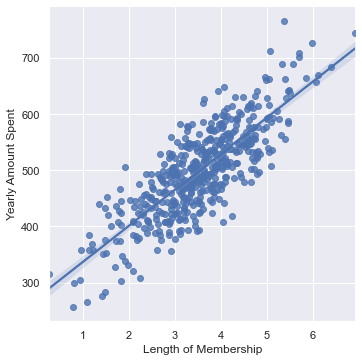

In [8]:
# Length of membership
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

Bagaimana dengan Length of `Time on App` dan `Time on Website`? 

### Time on App vs Yearly Amount Spent

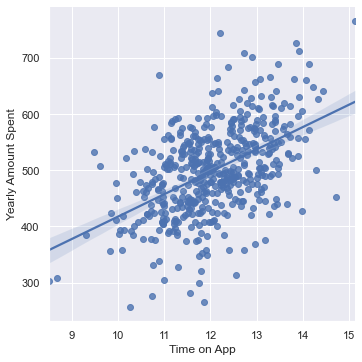

In [9]:
# time on app
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=df)

### Time on Web vs Yearly Amount Spent

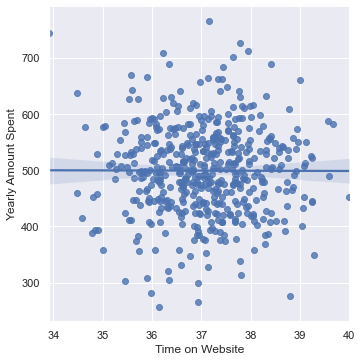

In [10]:
# time on web
sns.lmplot(x='Time on Website', y='Yearly Amount Spent', data=df)

### Heatmap

<AxesSubplot:>

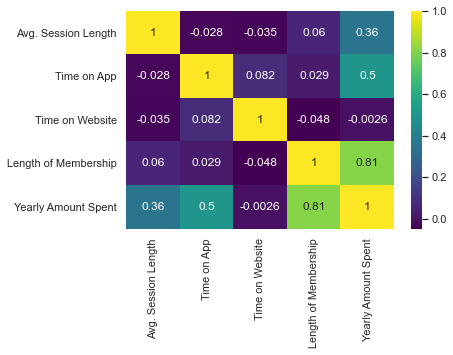

In [11]:
# korelasi dalam heatmap
sns.heatmap(df.corr().round(5), annot=True, cmap='viridis')

Dari grafik 2 plot di atas kita dapat berhipotesis jika fitur `Time on App` lebih berpengaruh daripada `Time on Web`. Berdasarkan grafik heatmap juga dapat dilihat jika fitur `Time on App` memiliki korelasi positif sebesar **0.5** sedangkan `Time on Web` memiliki korelasi negatif sebasar **0.0026**.

## Splitting Data Into Training and Testing Data

In [12]:
# Splitting Data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
# drop unused features
X.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Modelling

In [37]:
# modelling
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [38]:
linear_regression.fit(X_train, y_train)

LinearRegression()

## Predicting Data

In [39]:
# Predict Testing Data
y_pred = linear_regression.predict(X_test)

## Evaluation

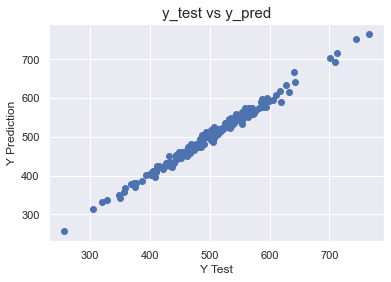

In [40]:
# Evaluation
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred", fontsize=15)
plt.xlabel("Y Test")
plt.ylabel("Y Prediction")
plt.show()

perbandingan antara nilai asli dan nilai prediksi cukup pada grafik terlihat cukup kecil dan cukup bagus

### MAE, MSE, RMSE

In [19]:
from sklearn import metrics

- MAE: Mean Absolute Error mewakili rata-rata selisih absolut antara nilai asli dan nilai prediksi. MAE mengukur rata-rata residual dalam dataset.
- MSE: Mean Squared Error mewakili rata-rata perbedaan kuadrat antara nilai asli dan nilai prediksi. MSE mengukur varians dari residu.
- RMSE: Root Mean Squared Error adalah akar kuadrat dari Mean Squared Error. RMSE mengukur deviasi standar dari residu.

In [41]:
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


Rata-rata selisih yang diperoleh antara nilai asli dan nilai prediksi model adalah $8.5. Model cukup baik dalam memprediksi nilai `Yearly Amount Spent` dari customer.

### Residual

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

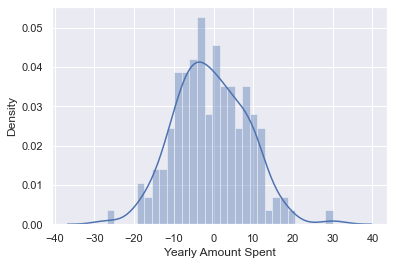

In [42]:
sns.distplot((y_test - y_pred), bins=30, kde=True)

In [21]:
# Coefficient for each features
coefficient = pd.DataFrame(linear_regression.coef_.round(3), X.columns)
coefficient.columns= ["Coefficient"]
coefficient

,Coefficient
Avg. Session Length,25.596
Time on App,38.785
Time on Website,0.310
Length of Membership,61.897


In [22]:
linear_regression.intercept_

-1044.2574146365555

Interpretasi Koefisien dari setiap feature:

- Jika semua fitur lainnya tetap, peningkatan 1 unit di **Avg. Session Length** dikaitkan dengan **peningkatan sebesar 25,596 dolar total yang dikeluarkan**.
- Jika semua fitur lainnya tetap, peningkatan 1 unit di **Time on App** dikaitkan dengan **peningkatan sebesar 38.785 dolar total yang dikeluarkan**.
- Jika semua fitur lainnya tetap, peningkatan 1 unit di **Time on Website** dikaitkan dengan **peningkatan sebesar 0.31 dolar total yang dikeluarkan**.
- Jika semua fitur lainnya tetap, peningkatan 1 unit di **Length of Membership** dikaitkan dengan **peningkatan sebesar 61.897 dolar total yang dikeluarkan**.


# Kesimpulan

Kesimpulan yang dapat diambil dari hasil analisis yang telah dilakukan adalah:
- Kembangkan pebsite untuk mengejar ketinggalan kinerja aplikasi mobile, 
- Kembangkan aplikasi mobile karena kinerjanya yang baik.